In [ ]:
!pip install scikit-learn

In [ ]:
# !pip install Sastrawi
!pip install nltk

In [ ]:
!pip install pydotplus

In [ ]:
#mount process for access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Library
import pandas as pd
import numpy as np
import string
import os
import re
from datetime import datetime

# Import matplotlib library for visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import NLTK library - word_tokenize library for tokenization process using nltk
# for process of pos-tagging, lemmatization and cleaning the stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Import Sklearn Library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn import model_selection, svm
from sklearn import svm #for svm algorithm
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# ------------------------------------------------------------------------------------------------------------------------------------
# Additional library for data pre-processing process
import spacy
import csv

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import pydotplus
#from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #import Indonesian Stemmer
from scipy.spatial import distance
from six import StringIO
from IPython.display import Image
porter_stemmer = PorterStemmer()

#for stopwords removal
from spacy.lang.en import English

#load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
from spacy.lang.en.stop_words import STOP_WORDS
sp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
data_maret = pd.read_excel('/content/drive/My Drive/Skripsi/sample_reviews_maret.xlsx')
data_mei = pd.read_excel('/content/drive/My Drive/Skripsi/sample_reviews_Mei.xlsx')

In [ ]:
#merge dataset
frames = [data_maret, data_mei]
df = pd.concat(frames)

#replace column's name
df = df.rename(columns={"pengguna" :"pengguna", "tweet": "tweet","clean_tweet" :"clean_tweet", "en_tweet" : "en_tweet", "text" : "text", "text_tokenized" : "text_tokenized", "text_tagging" : "text_tagging", "text_stopword" : "text_stopword", "text_stemmed" : "text_stemmed", "text_lemmatized" : "text_lemmatized", "polarity" : "polarity", "label" : "label"})
df = df[['pengguna','tweet', 'clean_tweet', 'en_tweet', 'text', 'text_tokenized', 'text_tagging', 'text_stopword', 'text_stemmed', 'text_lemmatized', 'polarity', 'label']]
df.head()

,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized,polarity,label
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"['is', 'a', 'hoop', 'for', 'a', 'child', 'in',...","[('is', 'VBZ'), ('a', 'DT'), ('hoop', 'NN'), (...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...",-0.05,negatif
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"['i', 'do', ""n't"", 'think', 'it', ""'s"", 'musli...","[('i', 'NNS'), ('do', 'VBP'), (""n't"", 'RB'), (...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...",0.00,netral
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","['it', ""'s"", 'been', 'a', 'year', 'since', 'th...","[('it', 'PRP'), (""'s"", 'VBZ'), ('been', 'VBN')...","[""'s"", 'year', 'since', 'invasion', 'yemen', '...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...",0.00,netral
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","['hopefully', ',', 'lastly', ',', 'before', 'b...","[('hopefully', 'RB'), (',', ','), ('lastly', '...","['hopefully', ',', 'lastly', ',', 'suspended',...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...",0.00,netral
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"['wkwkwk', 'even', 'though', 'the', 'saudis', ...","[('wkwkwk', 'NN'), ('even', 'RB'), ('though', ...","['wkwkwk', 'even', 'though', 'saudis', 'back',...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...",0.00,netral


In [ ]:
df.to_excel('/content/drive/My Drive/Skripsi/sample_reviews_gabungan.xlsx')

SVM Classifier Algorithm (Support vector machine Algorithm)
data training 70% dan data testing 30% dengan menjadikan test_size=0.3

In [ ]:
corpus = pd.read_excel('/content/drive/My Drive/Skripsi/sample_reviews_gabungan.xlsx')
corpus.head()

,Unnamed: 0,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized,polarity,label
0,0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"['is', 'a', 'hoop', 'for', 'a', 'child', 'in',...","[('is', 'VBZ'), ('a', 'DT'), ('hoop', 'NN'), (...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...",-0.05,negatif
1,1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"['i', 'do', ""n't"", 'think', 'it', ""'s"", 'musli...","[('i', 'NNS'), ('do', 'VBP'), (""n't"", 'RB'), (...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...",0.00,netral
2,2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","['it', ""'s"", 'been', 'a', 'year', 'since', 'th...","[('it', 'PRP'), (""'s"", 'VBZ'), ('been', 'VBN')...","[""'s"", 'year', 'since', 'invasion', 'yemen', '...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...",0.00,netral
3,3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","['hopefully', ',', 'lastly', ',', 'before', 'b...","[('hopefully', 'RB'), (',', ','), ('lastly', '...","['hopefully', ',', 'lastly', ',', 'suspended',...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...",0.00,netral
4,4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"['wkwkwk', 'even', 'though', 'the', 'saudis', ...","[('wkwkwk', 'NN'), ('even', 'RB'), ('though', ...","['wkwkwk', 'even', 'though', 'saudis', 'back',...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...",0.00,netral


# Text Classification dan Kalkulasi Akurasi
data training 70% dan data testing 30% dengan menjadikan test_size=0.3

In [ ]:
#rename colume text_lemmatized into text_final
corpus = corpus.rename(columns={'text_lemmatized':'text_final'})

#HOLD-OUT - Dividing testing and training data
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.3)
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.33, random_state=66)
Train_X,Test_X,Train_Y,Test_Y = train_test_split(corpus['text_final'],corpus['label'],test_size=0.3)

# Label encode - transform Categorical data of string (negatif, netral, positif) into numerical values (0,1,2)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
#TF-IDF Vectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#CHECKING
print(Tfidf_vect.vocabulary_)
print(Train_X_Tfidf)

{'hoop': 138, 'child': 55, 'north': 211, 'pakistan': 218, 'whose': 325, 'parent': 220, 'slaughter': 271, 'taliban': 295, 'shiit': 267, 'minor': 194, 'think': 304, 'muslim': 203, 'shia': 265, 'surpris': 289, 'someon': 274, 'year': 332, 'sinc': 269, 'invas': 148, 'yemen': 333, 'sunnah': 287, 'peopl': 224, 'yam': 330, 'hope': 139, 'lastli': 170, 'suspend': 290, 've': 320, 'start': 278, 'get': 123, 'critic': 72, 'wkwkwk': 326, 'even': 100, 'though': 305, 'saudi': 258, 'back': 32, 'yemeni': 334, 'govern': 128, 'houthi': 140, 'rebellion': 249, 'complic': 65, 'koranist': 168, 'alway': 15, 'point': 229, 'pray': 233, 'oh': 212, 'accord': 5, 'tradit': 308, 'mean': 191, 'stingi': 283, 'person': 226, 'follow': 115, 'follback': 114, 'porn': 231, 'pl': 228, 'cebong': 52, 'buzzerp': 50, 'pki': 227, 'blasphemi': 44, 'li': 173, 'bashar': 36, 'al': 10, 'assad': 25, 'armi': 22, 'israel': 154, 'behavior': 37, 'bad': 33, 'month': 198, 'ramadhan': 245, 'best': 39, 'opportun': 213, 'make': 183, 'peac': 223, 

SVM Classifier Algorithm (Support vector machine Algorithm)

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)

# fitting the model for grid search
grid.fit(Train_X_Tfidf, Train_Y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.588 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tunning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [ ]:
# re-run prediction model
grid_predictions = grid.predict(Test_X_Tfidf)

#print classification report
print(classification_report(Test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.75      1.00      0.86        18
           2       1.00      0.67      0.80        12

    accuracy                           0.83        36
   macro avg       0.92      0.78      0.82        36
weighted avg       0.88      0.83      0.83        36



Classifier - SVM Algorithm

In [ ]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=10, kernel='rbf', gamma=1)
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

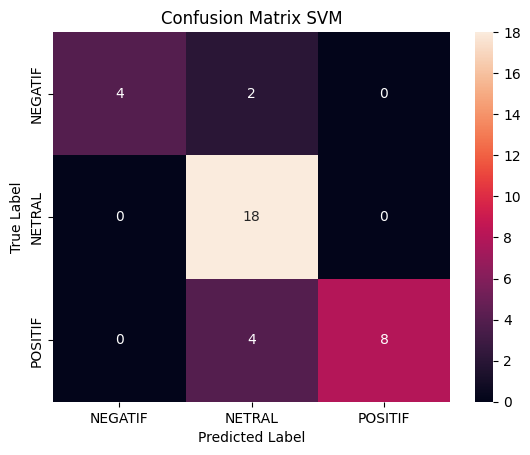

In [ ]:
# visualize classifier SVM algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_SVM)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# SVM RESULT
print("SVM RESULT")
print("Accuracy Score =",accuracy_score(predictions_SVM, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_SVM, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

SVM RESULT
Accuracy Score = 0.8333333333333334
Precision = 0.875
Recall = 0.8333333333333334
F-score = 0.8285714285714286


SVM Classifier Algorithm (Support vector machine Algorithm)

data training 80% dan data testing 20% dengan menjadikan test_size=0.2

In [ ]:
corpus = pd.read_excel('/content/drive/My Drive/Skripsi/sample_reviews_gabungan.xlsx')
corpus.head()

,Unnamed: 0,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized,polarity,label
0,0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"['is', 'a', 'hoop', 'for', 'a', 'child', 'in',...","[('is', 'VBZ'), ('a', 'DT'), ('hoop', 'NN'), (...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...",-0.05,negatif
1,1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"['i', 'do', ""n't"", 'think', 'it', ""'s"", 'musli...","[('i', 'NNS'), ('do', 'VBP'), (""n't"", 'RB'), (...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...",0.00,netral
2,2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","['it', ""'s"", 'been', 'a', 'year', 'since', 'th...","[('it', 'PRP'), (""'s"", 'VBZ'), ('been', 'VBN')...","[""'s"", 'year', 'since', 'invasion', 'yemen', '...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...",0.00,netral
3,3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","['hopefully', ',', 'lastly', ',', 'before', 'b...","[('hopefully', 'RB'), (',', ','), ('lastly', '...","['hopefully', ',', 'lastly', ',', 'suspended',...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...",0.00,netral
4,4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"['wkwkwk', 'even', 'though', 'the', 'saudis', ...","[('wkwkwk', 'NN'), ('even', 'RB'), ('though', ...","['wkwkwk', 'even', 'though', 'saudis', 'back',...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...",0.00,netral


Text Classification dan Kalkulasi Akurasi
data training 80% dan data testing 20% dengan menjadikan test_size=0.2

In [ ]:
#rename colume text_lemmatized into text_final
corpus = corpus.rename(columns={'text_lemmatized':'text_final'})

#HOLD-OUT - Dividing testing and training data
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.2)
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.20, random_state=66)
Train_X,Test_X,Train_Y,Test_Y = train_test_split(corpus['text_final'],corpus['label'],test_size=0.2)

# Label encode - transform Categorical data of string (negatif, netral, positif) into numerical values (0,1,2)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
#TF-IDF Vectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#CHECKING
print(Tfidf_vect.vocabulary_)
print(Train_X_Tfidf)

{'hoop': 138, 'child': 55, 'north': 211, 'pakistan': 218, 'whose': 325, 'parent': 220, 'slaughter': 271, 'taliban': 295, 'shiit': 267, 'minor': 194, 'think': 304, 'muslim': 203, 'shia': 265, 'surpris': 289, 'someon': 274, 'year': 332, 'sinc': 269, 'invas': 148, 'yemen': 333, 'sunnah': 287, 'peopl': 224, 'yam': 330, 'hope': 139, 'lastli': 170, 'suspend': 290, 've': 320, 'start': 278, 'get': 123, 'critic': 72, 'wkwkwk': 326, 'even': 100, 'though': 305, 'saudi': 258, 'back': 32, 'yemeni': 334, 'govern': 128, 'houthi': 140, 'rebellion': 249, 'complic': 65, 'koranist': 168, 'alway': 15, 'point': 229, 'pray': 233, 'oh': 212, 'accord': 5, 'tradit': 308, 'mean': 191, 'stingi': 283, 'person': 226, 'follow': 115, 'follback': 114, 'porn': 231, 'pl': 228, 'cebong': 52, 'buzzerp': 50, 'pki': 227, 'blasphemi': 44, 'li': 173, 'bashar': 36, 'al': 10, 'assad': 25, 'armi': 22, 'israel': 154, 'behavior': 37, 'bad': 33, 'month': 198, 'ramadhan': 245, 'best': 39, 'opportun': 213, 'make': 183, 'peac': 223, 

SVM Classifier Algorithm (Support vector machine Algorithm)
Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)

# fitting the model for grid search
grid.fit(Train_X_Tfidf, Train_Y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.579 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tunning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [ ]:
# re-run prediction model
grid_predictions = grid.predict(Test_X_Tfidf)

#print classification report
print(classification_report(Test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.83      1.00      0.91        10
           2       1.00      1.00      1.00         7

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.91        24
weighted avg       0.93      0.92      0.91        24



Classifier - SVM Algorithm

In [ ]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=10, kernel='rbf', gamma=0.1)
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

**Visualize Classifier - SVM Algorithm**

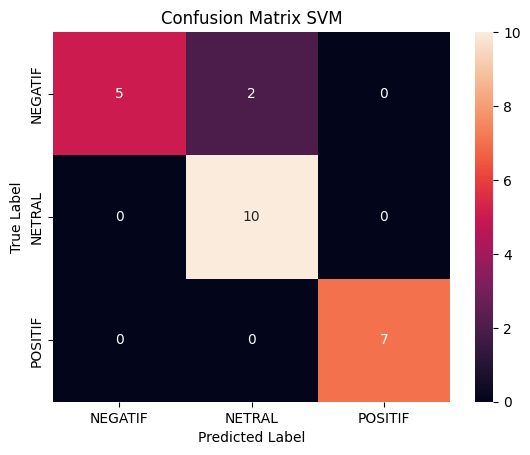

In [ ]:
# visualize classifier SVM algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_SVM)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# SVM RESULT
print("SVM RESULT")
print("Accuracy Score =",accuracy_score(predictions_SVM, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_SVM, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

SVM RESULT
Accuracy Score = 0.9166666666666666
Precision = 0.9305555555555557
Recall = 0.9166666666666666
F-score = 0.9135101010101009


**Random-forest-Classifier Algorithm**

data training 70% dan data testing 30% dengan menjadikan test_size=0.3

Hyperparameter Tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 112, 175, 237, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(Train_X_Tfidf, Train_Y)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 35, 60, 85, 110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 112, 175, 237, 300]},
             verbose=2)

In [ ]:
# print how our model looks after hyper-parameter tunning
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
#check accuracy
print (f'Train Accuracy - : {rf_Grid.score(Train_X_Tfidf,Train_Y ):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(Test_X_Tfidf,Test_Y):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.917


Classifier - Random-forest Algorithm

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn import model_selection

# fit the training dataset on the classifier
rf_clf = RandomForestClassifier(n_estimators=50, max_depth= None, max_features='auto', bootstrap=False, min_samples_leaf=1,
                                min_samples_split=2)
rf_clf.fit(Train_X_Tfidf, Train_Y)

# predict the labels on validation dataset
predictions_RFC = rf_clf.predict(Test_X_Tfidf )

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Visualize Classifier - Random-forest Algorithm

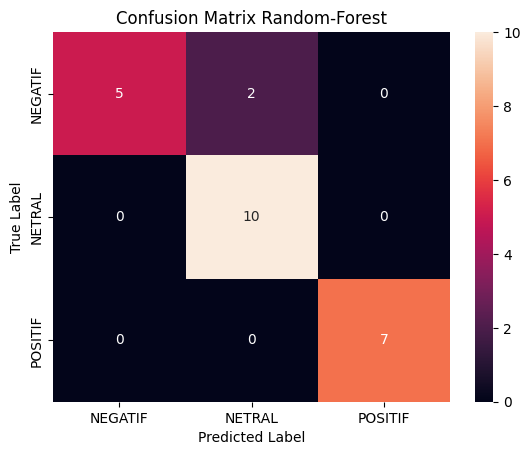

In [ ]:
# visualize classifier Random-forest algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_RFC)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix Random-Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# RANDOM FOREST RESULT
print("RANDOM FOREST RESULT")
print("Accuracy Score =",accuracy_score(predictions_RFC, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_RFC, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

RANDOM FOREST RESULT
Accuracy Score = 0.9166666666666666
Precision = 0.9305555555555557
Recall = 0.9166666666666666
F-score = 0.9135101010101009


**Random-forest-Classifier Algorithm**

data training 80% dan data testing 20% dengan menjadikan test_size=0.2

In [ ]:
#rename colume text_lemmatized into text_final
corpus = corpus.rename(columns={'text_lemmatized':'text_final'})

#HOLD-OUT - Dividing testing and training data
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.2)
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.20, random_state=66)
Train_X,Test_X,Train_Y,Test_Y = train_test_split(corpus['text_final'],corpus['label'],test_size=0.2)

# Label encode - transform Categorical data of string (negatif, netral, positif) into numerical values (0,1,2)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
#TF-IDF Vectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#CHECKING
print(Tfidf_vect.vocabulary_)
print(Train_X_Tfidf)

{'hoop': 138, 'child': 55, 'north': 211, 'pakistan': 218, 'whose': 325, 'parent': 220, 'slaughter': 271, 'taliban': 295, 'shiit': 267, 'minor': 194, 'think': 304, 'muslim': 203, 'shia': 265, 'surpris': 289, 'someon': 274, 'year': 332, 'sinc': 269, 'invas': 148, 'yemen': 333, 'sunnah': 287, 'peopl': 224, 'yam': 330, 'hope': 139, 'lastli': 170, 'suspend': 290, 've': 320, 'start': 278, 'get': 123, 'critic': 72, 'wkwkwk': 326, 'even': 100, 'though': 305, 'saudi': 258, 'back': 32, 'yemeni': 334, 'govern': 128, 'houthi': 140, 'rebellion': 249, 'complic': 65, 'koranist': 168, 'alway': 15, 'point': 229, 'pray': 233, 'oh': 212, 'accord': 5, 'tradit': 308, 'mean': 191, 'stingi': 283, 'person': 226, 'follow': 115, 'follback': 114, 'porn': 231, 'pl': 228, 'cebong': 52, 'buzzerp': 50, 'pki': 227, 'blasphemi': 44, 'li': 173, 'bashar': 36, 'al': 10, 'assad': 25, 'armi': 22, 'israel': 154, 'behavior': 37, 'bad': 33, 'month': 198, 'ramadhan': 245, 'best': 39, 'opportun': 213, 'make': 183, 'peac': 223, 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 112, 175, 237, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(Train_X_Tfidf, Train_Y)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 35, 60, 85, 110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 112, 175, 237, 300]},
             verbose=2)

In [ ]:
# print how our model looks after hyper-parameter tunning
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
#check accuracy
print (f'Train Accuracy - : {rf_Grid.score(Train_X_Tfidf,Train_Y ):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(Test_X_Tfidf,Test_Y):.3f}')

Train Accuracy - : 0.745
Test Accuracy - : 0.333


Classifier - Random-forest Algorithm

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn import model_selection

# fit the training dataset on the classifier
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=10, max_features='auto', bootstrap=False, min_samples_leaf=2,
                                min_samples_split=2)
rf_clf.fit(Train_X_Tfidf, Train_Y)

# predict the labels on validation dataset
predictions_RFC = rf_clf.predict(Test_X_Tfidf )

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


**Visualize Classifier - Random-forest Algorithm**

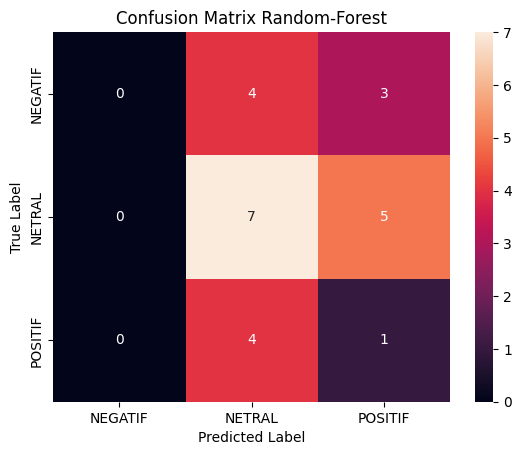

In [ ]:
# visualize classifier Random-forest algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_RFC)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix Random-Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# RANDOM FOREST RESULT
print("RANDOM FOREST RESULT")
print("Accuracy Score =",accuracy_score(predictions_RFC, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_RFC, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

RANDOM FOREST RESULT
Accuracy Score = 0.3333333333333333
Precision = 0.2564814814814815
Recall = 0.3333333333333333
F-score = 0.28902116402116407


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
